In [ ]:
# !pip install squarify
# !pip install matplotlib==3.3.3
# !pip install pyclustertend
# !pip install numba==0.53

In [ ]:
# from google.colab import drive
# drive.mount("/content/gdrive", force_remount=True)

%cd "C:\Users\khaih\Downloads\Project 3\Data"

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import squarify
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("CDNOW_master.txt", delim_whitespace=True, header = None, names = ['customer_id', 'date', 'number_of_cds', 'dollar_value'])

In [4]:
data.head()

customer_id      date  number_of_cds  dollar_value
0            1  19970101              1         11.77
1            2  19970112              1         12.00
2            2  19970112              5         77.00
3            3  19970102              2         20.76
4            3  19970330              2         20.76

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   customer_id    69659 non-null  int64  
 1   date           69659 non-null  int64  
 2   number_of_cds  69659 non-null  int64  
 3   dollar_value   69659 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 2.1 MB


In [6]:
data.isnull().sum()

customer_id      0
date             0
number_of_cds    0
dollar_value     0
dtype: int64

- Không có dữ liệu null

In [7]:
data.describe()

customer_id          date  number_of_cds  dollar_value
count  69659.000000  6.965900e+04   69659.000000  69659.000000
mean   11470.854592  1.997228e+07       2.410040     35.893648
std     6819.904848  3.837735e+03       2.333924     36.281942
min        1.000000  1.997010e+07       1.000000      0.000000
25%     5506.000000  1.997022e+07       1.000000     14.490000
50%    11410.000000  1.997042e+07       2.000000     25.980000
75%    17273.000000  1.997111e+07       3.000000     43.700000
max    23570.000000  1.998063e+07      99.000000   1286.010000

In [8]:
string_to_date = lambda x : datetime.strptime(str(x), "%Y%m%d").date()

# Convert InvoiceDate from object to datetime format
data['date'] = data['date'].apply(string_to_date)
data['date'] = data['date'].astype('datetime64[ns]')

In [9]:
data.head()

customer_id       date  number_of_cds  dollar_value
0            1 1997-01-01              1         11.77
1            2 1997-01-12              1         12.00
2            2 1997-01-12              5         77.00
3            3 1997-01-02              2         20.76
4            3 1997-03-30              2         20.76

In [10]:
data.tail(3)

customer_id       date  number_of_cds  dollar_value
69656        23569 1997-03-25              2         25.74
69657        23570 1997-03-25              3         51.12
69658        23570 1997-03-26              2         42.96

In [11]:
data=data.loc[data["dollar_value"]>0]

In [12]:
most_customer=data.groupby('customer_id').size().reset_index()
most_customer.columns = ['customer_id', 'frequency']
most_customer.sort_values("frequency",ascending=False)

customer_id  frequency
14002        14048        217
7562          7592        201
7951          7983        149
21997        22061        143
3033          3049        117
...            ...        ...
10454        10491          1
10455        10492          1
10457        10494          1
10461        10498          1
11751        11791          1

[23502 rows x 2 columns]

Text(0.5, 1.0, 'Top 10 customer with high frequency of spending')

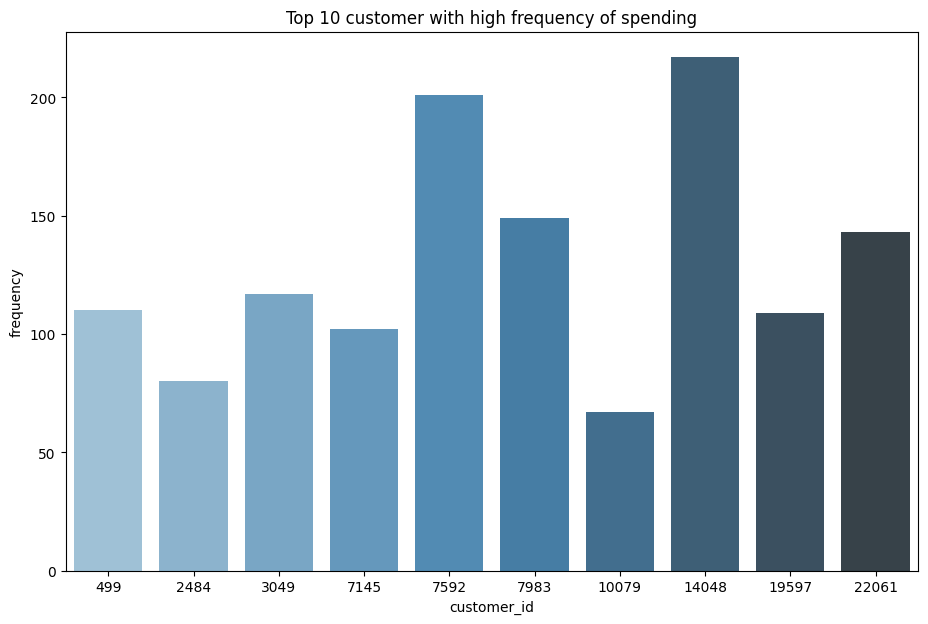

In [13]:
%matplotlib inline

plt.figure(figsize=(11, 7))
sns.barplot(x="customer_id", y="frequency", data=most_customer.sort_values("frequency",ascending=False).head(10), palette="Blues_d")
plt.title("Top 10 customer with high frequency of spending")

In [14]:
most_customer_monetery=data.groupby('customer_id').sum().reset_index()
most_customer_monetery.sort_values("dollar_value",ascending=False)

customer_id  number_of_cds  dollar_value
7562          7592            917      13990.93
14002        14048           1033       8976.33
7951          7983            536       6973.07
19281        19339            378       6552.70
7899          7931            514       6497.18
...            ...            ...           ...
16065        16115              1          3.99
1759          1770              1          3.99
3460          3477              1          3.99
5358          5383              1          3.99
17259        17312              1          3.99

[23502 rows x 3 columns]

Text(0.5, 1.0, 'Top 10 customer spending the most')

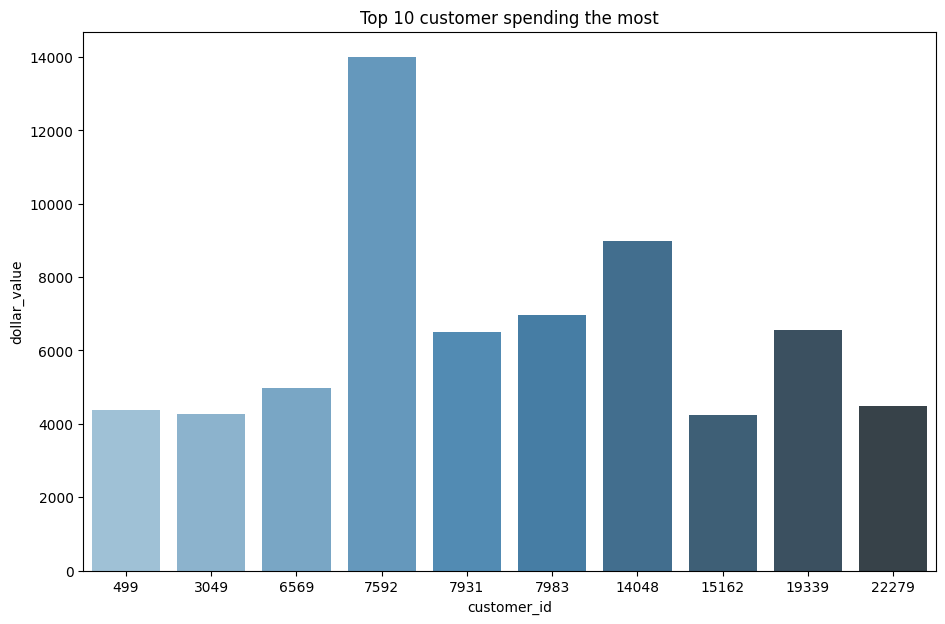

In [15]:
%matplotlib inline

plt.figure(figsize=(11, 7))
sns.barplot(x="customer_id", y="dollar_value", data=most_customer_monetery.sort_values("dollar_value",ascending=False).head(10), palette="Blues_d")
plt.title("Top 10 customer spending the most")

In [16]:
# Let’s take a closer look at the data we will need to manipulate.
print('Transactions timeframe from {} to {}'.format(data['date'].min(), data['date'].max()))
print('{:,} transactions don\'t have a customer id'.format(data[data.customer_id.isnull()].shape[0]))
print('{:,} unique customer_id'.format(len(data.customer_id.unique())))

Transactions timeframe from 1997-01-01 00:00:00 to 1998-06-30 00:00:00
0 transactions don't have a customer id
23,502 unique customer_id


### Create RFM analysis for each customers

In [17]:
max_date = data['date'].max().date()

Recency = lambda x : (max_date - x.max().date()).days
Monetary = lambda x : round(sum(x), 2)

data_RFM = data.groupby('customer_id').agg({'date': Recency,
                                        "customer_id": ["count"],  
                                        "dollar_value": Monetary })
data_RFM.columns=[["date","frequency","dollar_value"]]

In [18]:
data_RFM.head()

date frequency dollar_value
customer_id                            
1            545         1        11.77
2            534         2        89.00
3             33         6       156.46
4            200         4       100.50
5            178        11       385.61

In [19]:
data_RFM.columns = ['Recency', 'Frequency', 'Monetary'] 
data_RFM = data_RFM.sort_values('Monetary', ascending=False)

In [20]:
data_RFM.head()

Recency  Frequency  Monetary
customer_id                              
7592               1        201  13990.93
14048              0        217   8976.33
7983               5        149   6973.07
19339            445         56   6552.70
7931              17         62   6497.18

In [21]:
data_RFM.shape

(23502, 3)

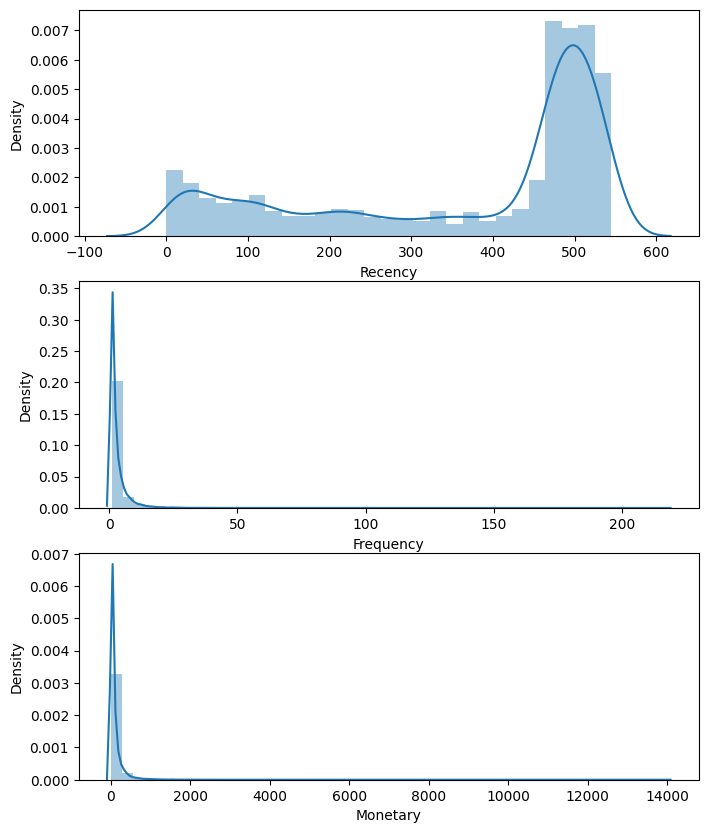

In [22]:
### Virsulization
plt.figure(figsize=(8,10))
plt.subplot(3, 1, 1)
sns.distplot(data_RFM['Recency'])# Plot distribution of R
plt.subplot(3, 1, 2)
sns.distplot(data_RFM['Frequency'])# Plot distribution of F
plt.subplot(3, 1, 3)
sns.distplot(data_RFM['Monetary']) # Plot distribution of M
plt.show()

### Calculate RFM quartiles

In [23]:
# Create labels for Recency, Frequency, Monetary
r_labels = range(4, 0, -1)
f_labels = range(1, 5)
m_labels = range(1, 5)

In [24]:
[*r_labels]

[4, 3, 2, 1]

In [25]:
# Assign these labels to 4 equal percentile groups 
r_groups = pd.qcut(data_RFM['Recency'].rank(method='first'), q=4, labels=r_labels)

f_groups = pd.qcut(data_RFM['Frequency'].rank(method='first'), q=4, labels=f_labels)
 
m_groups = pd.qcut(data_RFM['Monetary'].rank(method='first'), q=4, labels=m_labels)

In [26]:
# Create new columns R, F, M
data_RFM = data_RFM.assign(R = r_groups.values, F = f_groups.values,  M = m_groups.values)
data_RFM.head()

Recency  Frequency  Monetary  R  F  M
customer_id                                       
7592               1        201  13990.93  4  4  4
14048              0        217   8976.33  4  4  4
7983               5        149   6973.07  4  4  4
19339            445         56   6552.70  3  4  4
7931              17         62   6497.18  4  4  4

### Concat RFM quartile values to create RFM Segments

In [27]:
def join_rfm(x): return str(int(x['R'])) + str(int(x['F'])) + str(int(x['M']))
data_RFM['RFM_Segment'] = data_RFM.apply(join_rfm, axis=1)

In [28]:
data_RFM.head()

Recency  Frequency  Monetary  R  F  M RFM_Segment
customer_id                                                   
7592               1        201  13990.93  4  4  4         444
14048              0        217   8976.33  4  4  4         444
7983               5        149   6973.07  4  4  4         444
19339            445         56   6552.70  3  4  4         344
7931              17         62   6497.18  4  4  4         444

### Count num of unique segments

In [29]:
rfm_count_unique = data_RFM.groupby('RFM_Segment')['RFM_Segment'].nunique()

In [30]:
print(rfm_count_unique.sum())

44


- Having 44 different segments using the concatenate method quickly becomes unwieldy for any practical use. We will need a more concise way to define our segments.

### Calculate RFM score and level

In [31]:
# Calculate RFM_Score
data_RFM['RFM_Score'] = data_RFM[['R','F','M']].sum(axis=1)
data_RFM.head()

Recency  Frequency  Monetary  R  F  M RFM_Segment  RFM_Score
customer_id                                                              
7592               1        201  13990.93  4  4  4         444         12
14048              0        217   8976.33  4  4  4         444         12
7983               5        149   6973.07  4  4  4         444         12
19339            445         56   6552.70  3  4  4         344         11
7931              17         62   6497.18  4  4  4         444         12

### Manual Segmentation

In [32]:
def rfm_level(df):
    # dua tren nghiep vu
    # kha nang thuc hien cac chien dich cho cac nhom
    if (df['RFM_Score'] == 12) :
        return 'STARS'
    
    elif (df['R'] == 4 and df['F'] ==1 and df['M'] == 1):
        return 'NEW'
    
    else:     
        if df['M'] == 4:
            return 'BIG SPENDER'
        
        elif df['F'] == 4:
            return 'LOYAL'
        
        elif df['R'] == 4:
            return 'ACTIVE'
        
        elif df['R'] == 1:
            return 'LOST'
        
        elif df['M'] == 1:
            return 'LIGHT'
        
        return 'REGULARS'

In [33]:
# Create a new column RFM_Level
data_RFM['RFM_Level'] = data_RFM.apply(rfm_level, axis=1)

In [34]:
data_RFM.head()

Recency  Frequency  Monetary  R  F  M RFM_Segment  RFM_Score  \
customer_id                                                                 
7592               1        201  13990.93  4  4  4         444         12   
14048              0        217   8976.33  4  4  4         444         12   
7983               5        149   6973.07  4  4  4         444         12   
19339            445         56   6552.70  3  4  4         344         11   
7931              17         62   6497.18  4  4  4         444         12   

               RFM_Level  
customer_id               
7592               STARS  
14048              STARS  
7983               STARS  
19339        BIG SPENDER  
7931               STARS

In [35]:
# Print the header with top 5 rows 
data_RFM[::2000]

Recency  Frequency  Monetary  R  F  M RFM_Segment  RFM_Score  \
customer_id                                                                 
7592               1        201  13990.93  4  4  4         444         12   
9681              20          7    274.13  4  4  4         444         12   
14232             25          3    156.50  4  3  4         434         11   
22510            463          1    104.13  3  1  3         313          7   
23145            319          2     74.31  3  3  3         333          9   
21733            454          2     55.86  3  3  3         333          9   
11744            503          1     42.46  2  1  2         212          5   
2398             536          1     31.98  1  1  2         112          4   
16071            383          2     26.16  3  3  2         332          8   
21265            471          1     17.99  3  2  1         321          6   
4037             529          1     14.37  1  2  1         121          4   
7630             517          1     11.77  1  2  1         121          4   

               RFM_Level  
customer_id               
7592               STARS  
9681               STARS  
14232        BIG SPENDER  
22510           REGULARS  
23145           REGULARS  
21733           REGULARS  
11744           REGULARS  
2398                LOST  
16071           REGULARS  
21265              LIGHT  
4037                LOST  
7630                LOST

In [36]:
data_RFM.to_csv("RFM_data.csv")

### Number of segments

In [37]:
data_RFM['RFM_Level'].value_counts()

REGULARS       6005
LOST           5658
STARS          3397
LIGHT          3225
BIG SPENDER    2479
LOYAL          1551
ACTIVE         1187
Name: RFM_Level, dtype: int64

### Calculate mean values for each segment

In [38]:
# Calculate average values for each RFM_Level, and return a size of each segment 
rfm_agg = data_RFM.groupby('RFM_Level').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']}).round(0)

rfm_agg.columns = rfm_agg.columns.droplevel()
rfm_agg.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']
rfm_agg['Percent'] = round((rfm_agg['Count']/rfm_agg.Count.sum())*100, 2)

# Reset the index
rfm_agg = rfm_agg.reset_index()

In [39]:
rfm_agg

RFM_Level  RecencyMean  FrequencyMean  MonetaryMean  Count  Percent
0       ACTIVE        107.0            2.0          59.0   1187     5.05
1  BIG SPENDER        322.0            4.0         209.0   2479    10.55
2        LIGHT        481.0            1.0          14.0   3225    13.72
3         LOST        523.0            1.0          29.0   5658    24.07
4        LOYAL        201.0            4.0          68.0   1551     6.60
5     REGULARS        438.0            2.0          47.0   6005    25.55
6        STARS         70.0           10.0         388.0   3397    14.45

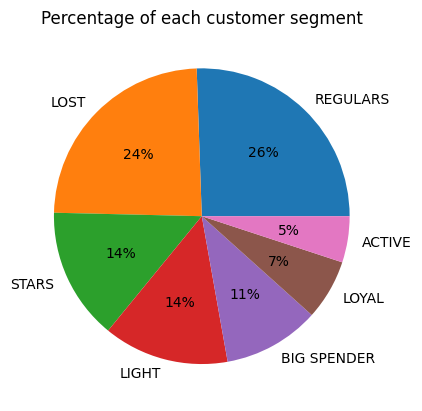

In [40]:
from importlib import reload
plt=reload(plt)
plt.pie(data_RFM.RFM_Level.value_counts(),labels=data_RFM.RFM_Level.value_counts().index,autopct='%.0f%%')
plt.title("Percentage of each customer segment")
plt.show()

#### TreeMap

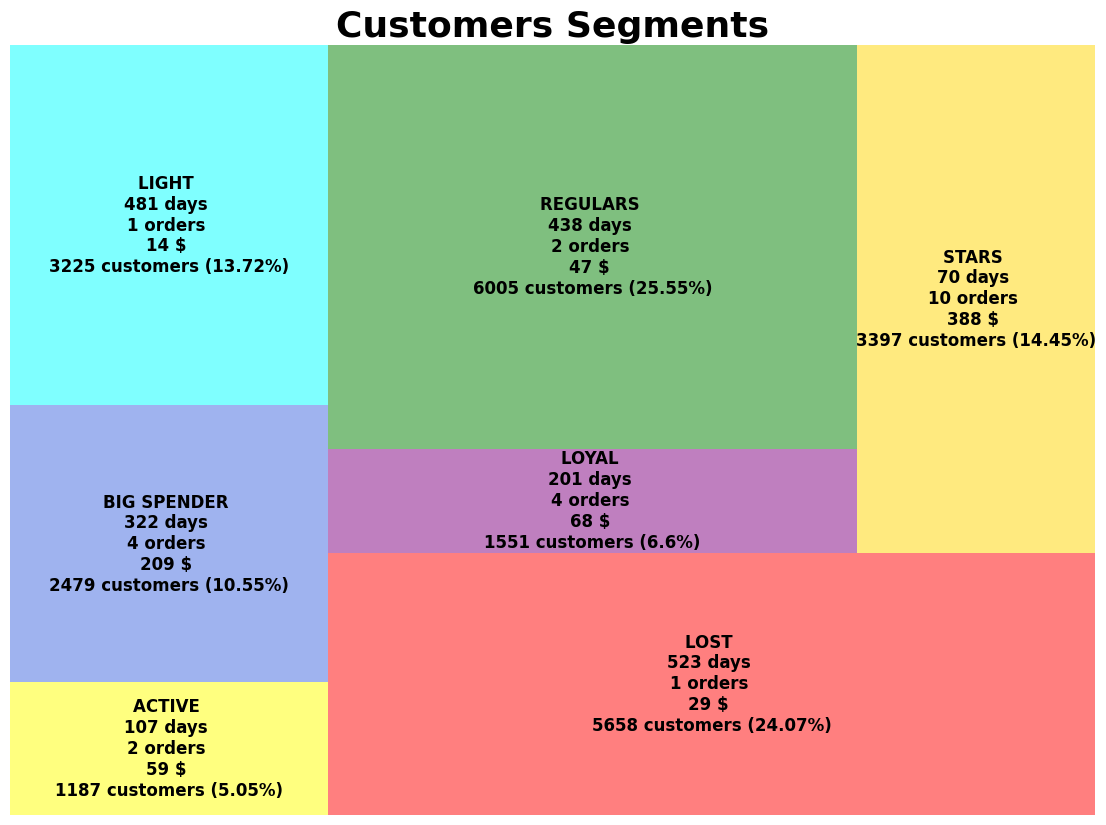

In [41]:
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(14, 10)

colors_dict = {'ACTIVE':'yellow','BIG SPENDER':'royalblue', 'LIGHT':'cyan',
               'LOST':'red', 'LOYAL':'purple', 'POTENTIAL':'green', 'STARS':'gold'}

squarify.plot(sizes=rfm_agg['Count'],
              text_kwargs={'fontsize':12,'weight':'bold', 'fontname':"sans serif"},
              color=colors_dict.values(),
              label=['{} \n{:.0f} days \n{:.0f} orders \n{:.0f} $ \n{:.0f} customers ({}%)'.format(*rfm_agg.iloc[i])
                      for i in range(0, len(rfm_agg))], alpha=0.5 )


plt.title("Customers Segments",fontsize=26,fontweight="bold")
plt.axis('off')

plt.savefig('RFM Segments.png')
plt.show()

#### Scatter Plot (RFM)

In [42]:
import plotly.express as px

fig = px.scatter(rfm_agg, x="RecencyMean", y="MonetaryMean", size="FrequencyMean", color="RFM_Level",
           hover_name="RFM_Level", size_max=100)
fig.show()

#### 3d Scatter Plot (RFM)

In [43]:
import plotly.express as px

fig = px.scatter_3d(data_RFM, x='Recency', y='Frequency', z='Monetary',
                    color = 'RFM_Level', opacity=0.5,
                    color_discrete_map = colors_dict)
fig.update_traces(marker=dict(size=5),
                  
                  selector=dict(mode='markers'))
fig.show()

## Kmeans clusters with the Elbow Method

In [44]:
df_now = data_RFM[['Recency','Frequency','Monetary']]
df_now

Recency  Frequency  Monetary
customer_id                              
7592               1        201  13990.93
14048              0        217   8976.33
7983               5        149   6973.07
19339            445         56   6552.70
7931              17         62   6497.18
...              ...        ...       ...
16115            489          1      3.99
1770             538          1      3.99
3477             532          1      3.99
5383             525          1      3.99
17312            485          1      3.99

[23502 rows x 3 columns]

In [45]:
## Function to check skewness
def check_skew(df_skew, column):
    skew = stats.skew(df_skew[column])
    skewtest = stats.skewtest(df_skew[column])
    plt.title('Distribution of ' + column)
    sns.distplot(df_skew[column])
    print("{}'s: Skew: {}, : {}".format(column, skew, skewtest))
    return

In [46]:
RFM_Table_scaled=df_now.copy()
RFM_Table_scaled.head()

Recency  Frequency  Monetary
customer_id                              
7592               1        201  13990.93
14048              0        217   8976.33
7983               5        149   6973.07
19339            445         56   6552.70
7931              17         62   6497.18

In [47]:
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# RFM_Table_scaled = np.log(data_scaler+1)
# RFM_Table_scaled=data_scaler
# scaler = MinMaxScaler()
# scaler.fit(RFM_Table_scaled)
# RFM_Table_scaled = scaler.transform(RFM_Table_scaled)

# RFM_Table_scaled=pd.DataFrame(RFM_Table_scaled,columns=data_scaler.columns)
# RFM_Table_scaled.head()

Recency's: Skew: -2.104592355687184, : SkewtestResult(statistic=-85.67412479391174, pvalue=0.0)
Frequency's: Skew: 1.4809572124412247, : SkewtestResult(statistic=69.38438428554778, pvalue=0.0)
Monetary's: Skew: 0.6004080226561723, : SkewtestResult(statistic=34.83278501660026, pvalue=7.76018244124933e-266)


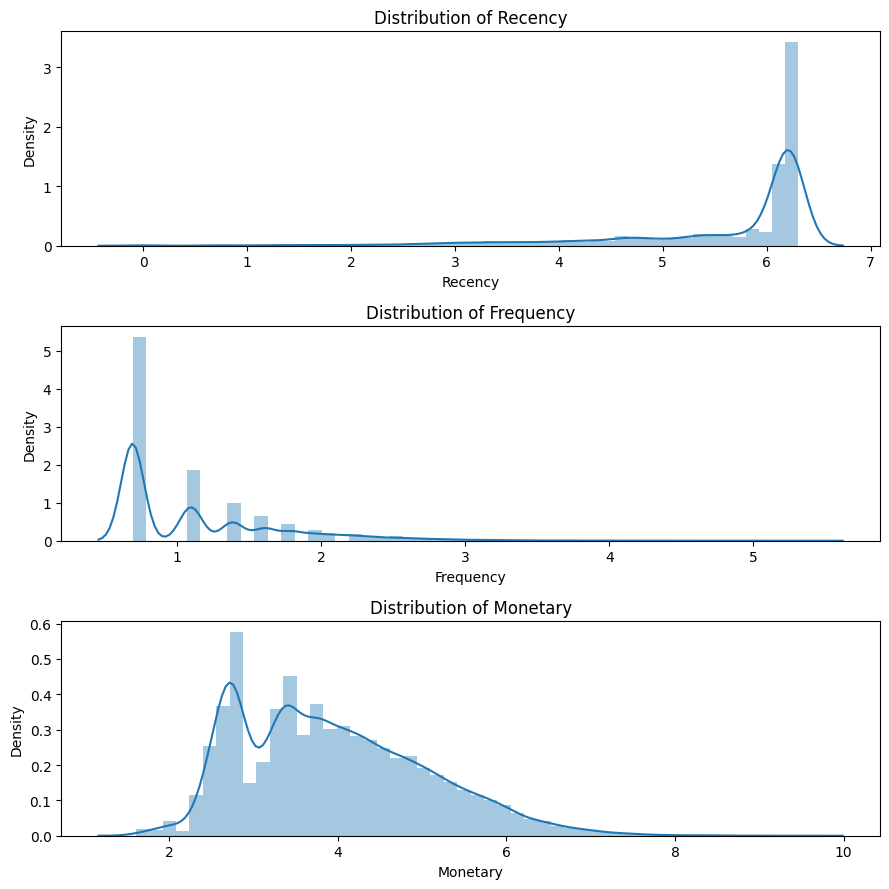

In [48]:

RFM_Table_scaled = np.log(RFM_Table_scaled+1)

plt.figure(figsize=(9, 9))
plt.subplot(3, 1, 1)
check_skew(RFM_Table_scaled,'Recency')
plt.subplot(3, 1, 2)
check_skew(RFM_Table_scaled,'Frequency')
plt.subplot(3, 1, 3)
check_skew(RFM_Table_scaled,'Monetary')
plt.tight_layout()

In [49]:
# #df_rfm_log = np.log(data_scaler+1)
# RFM_Table_scaled

In [50]:
scaler = StandardScaler()
scaler.fit(RFM_Table_scaled)
RFM_Table_scaled = scaler.transform(RFM_Table_scaled)

In [51]:
from sklearn.cluster import KMeans
sse = {}
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(RFM_Table_scaled)
    sse[k] = kmeans.inertia_ # SSE to closest cluster centroid

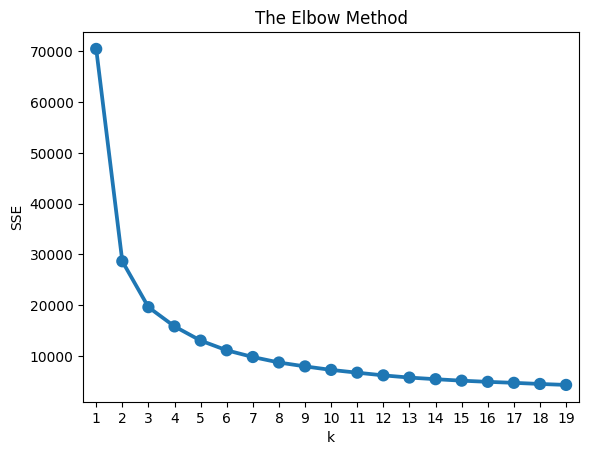

In [52]:
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

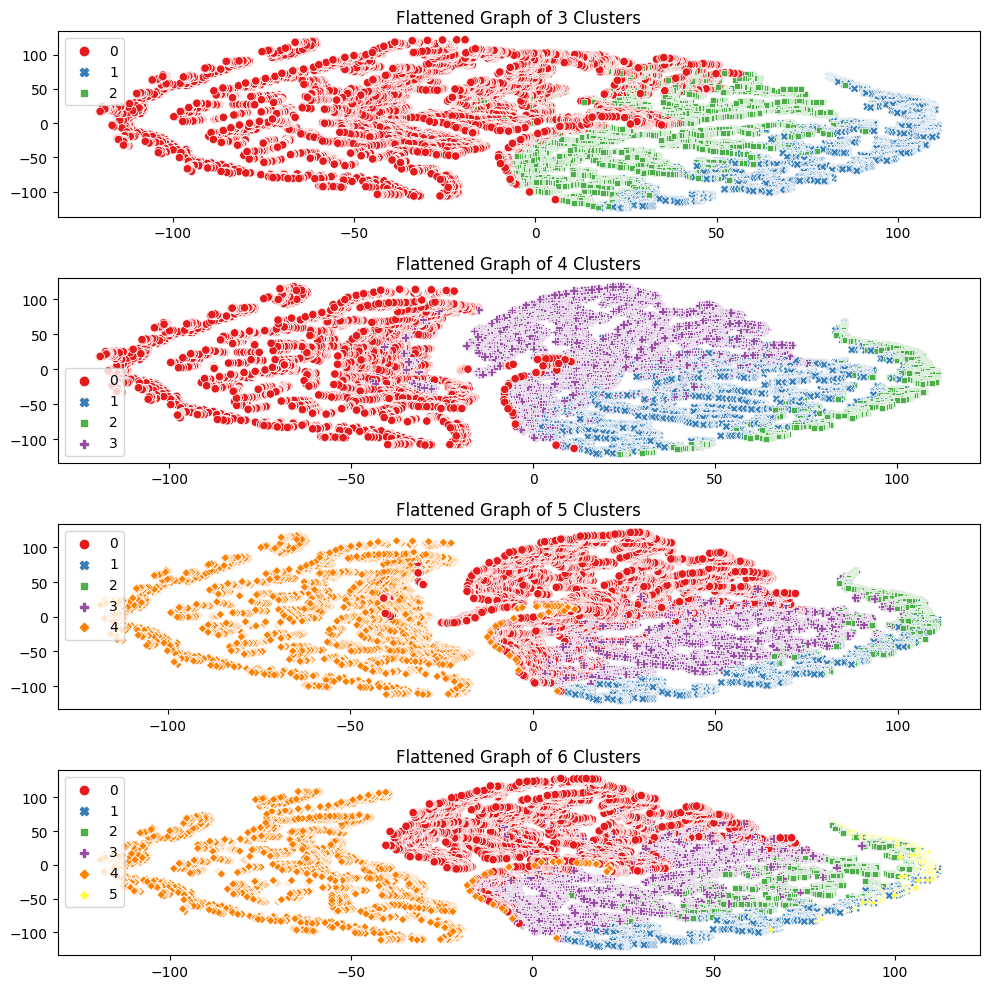

In [53]:
from sklearn.manifold import TSNE
def kmeans(normalised_df_rfm, clusters_number, original_df_rfm):
    
    kmeans = KMeans(n_clusters = clusters_number, random_state = 42)
    kmeans.fit(normalised_df_rfm)
# Extract cluster labels
    cluster_labels = kmeans.labels_
        
    # Create a cluster label column in original dataset
    df_new = original_df_rfm.assign(Cluster = cluster_labels)
    
    # Initialise TSNE
    model = TSNE(random_state=1)
    transformed = model.fit_transform(df_new)
    
    # Plot t-SNE
    plt.title('Flattened Graph of {} Clusters'.format(clusters_number))
    sns.scatterplot(x=transformed[:,0], y=transformed[:,1], hue=cluster_labels, style=cluster_labels, palette="Set1")
    
    return df_new
plt.figure(figsize=(10, 10))
plt.subplot(4, 1, 1)
df_rfm_k3 = kmeans(RFM_Table_scaled, 3, df_now)
plt.subplot(4, 1, 2)
df_rfm_k4 = kmeans(RFM_Table_scaled, 4, df_now)
plt.subplot(4, 1, 3)
df_rfm_k5 = kmeans(RFM_Table_scaled, 5, df_now)
plt.subplot(4, 1, 4)
df_rfm_k6 = kmeans(RFM_Table_scaled, 6, df_now)
plt.tight_layout()

In [54]:
def snake_plot(normalised_df_rfm, df_rfm_kmeans, df_rfm_original):

    normalised_df_rfm = pd.DataFrame(normalised_df_rfm, 
                                       index=df_now.index, 
                                       columns=df_now.columns)
    normalised_df_rfm['Cluster'] = df_rfm_kmeans['Cluster']

    # Melt data into long format
    df_melt = pd.melt(normalised_df_rfm.reset_index(), 
                        id_vars=['Cluster'],
                        value_vars=['Recency', 'Frequency', 'Monetary'], 
                        var_name='Metric', 
                        value_name='Value')

    plt.xlabel('Metric')
    plt.ylabel('Value')
    sns.pointplot(data=df_melt, x='Metric', y='Value', hue='Cluster')
    
    return

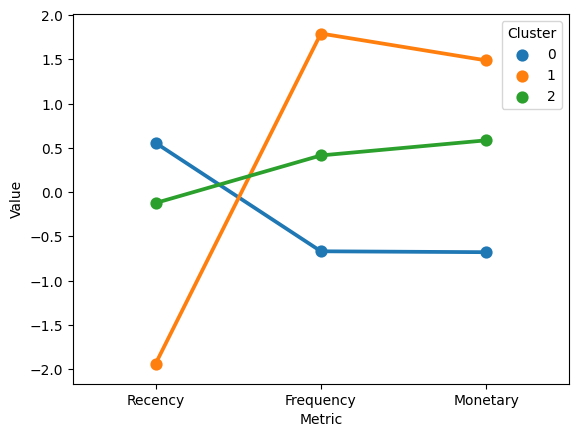

In [55]:
snake_plot(RFM_Table_scaled,df_rfm_k3,df_now)

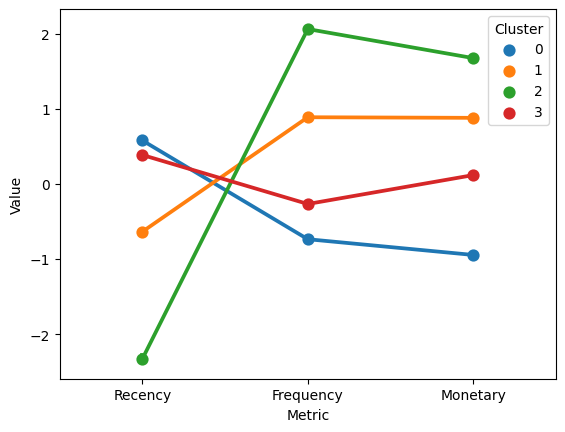

In [56]:
snake_plot(RFM_Table_scaled,df_rfm_k4,df_now)

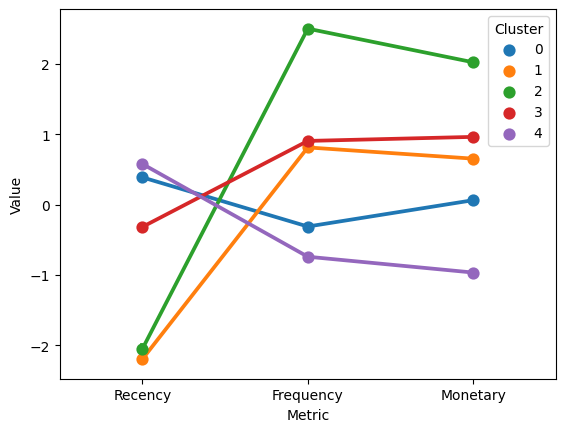

In [57]:
snake_plot(RFM_Table_scaled,df_rfm_k5,df_now)

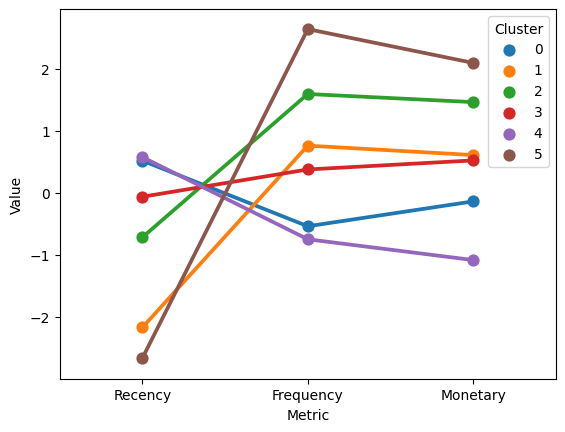

In [58]:
snake_plot(RFM_Table_scaled,df_rfm_k6,df_now)

### K=5

In [59]:
# Build model with k=6
model = KMeans(n_clusters=5, random_state=42)
model.fit(RFM_Table_scaled)
model.labels_.shape

(23502,)

In [60]:
df_now["Cluster"] = model.labels_
df_now.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'Monetary':['mean', 'count']}).round(2)

Recency Frequency Monetary      
           mean      mean     mean count
Cluster                                 
0        428.50      1.68    61.27  7350
1         32.61      4.31   126.50  1619
2         47.84     14.53   622.90  1527
3        218.92      4.60   178.16  4118
4        500.01      1.02    18.04  8888

In [62]:
# Calculate average values for each RFM_Level, and return a size of each segment 
rfm_agg_kmeans_k_5 = df_now.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']}).round(0)

rfm_agg_kmeans_k_5.columns = rfm_agg_kmeans_k_5.columns.droplevel()
rfm_agg_kmeans_k_5.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']
rfm_agg_kmeans_k_5['Percent'] = round((rfm_agg_kmeans_k_5['Count']/rfm_agg_kmeans_k_5.Count.sum())*100, 2)

# Reset the index
rfm_agg_kmeans_k_5 = rfm_agg_kmeans_k_5.reset_index()

# Change thr Cluster Columns Datatype into discrete values
rfm_agg_kmeans_k_5['Cluster'] = 'Cluster '+ rfm_agg_kmeans_k_5['Cluster'].astype('str')

# Print the aggregated dataset
rfm_agg_kmeans_k_5

Cluster  RecencyMean  FrequencyMean  MonetaryMean  Count  Percent
0  Cluster 0        428.0            2.0          61.0   7350    31.27
1  Cluster 1         33.0            4.0         126.0   1619     6.89
2  Cluster 2         48.0           15.0         623.0   1527     6.50
3  Cluster 3        219.0            5.0         178.0   4118    17.52
4  Cluster 4        500.0            1.0          18.0   8888    37.82

In [63]:
def cluster_function(prediction):
    if prediction =="Cluster 0":
        return "Regular"
    elif prediction =="Cluster 1":
        return "Loyal"
    elif prediction =="Cluster 2":
        return "Star"
    elif prediction =="Cluster 3":
        return "Big Spender"
    return "Lost Cheap"

rfm_agg_kmeans_k_5["type"]=rfm_agg_kmeans_k_5["Cluster"].map(lambda x: (cluster_function(x)))

In [64]:
rfm_agg_kmeans_k_5

Cluster  RecencyMean  FrequencyMean  MonetaryMean  Count  Percent  \
0  Cluster 0        428.0            2.0          61.0   7350    31.27   
1  Cluster 1         33.0            4.0         126.0   1619     6.89   
2  Cluster 2         48.0           15.0         623.0   1527     6.50   
3  Cluster 3        219.0            5.0         178.0   4118    17.52   
4  Cluster 4        500.0            1.0          18.0   8888    37.82   

          type  
0      Regular  
1        Loyal  
2         Star  
3  Big Spender  
4   Lost Cheap

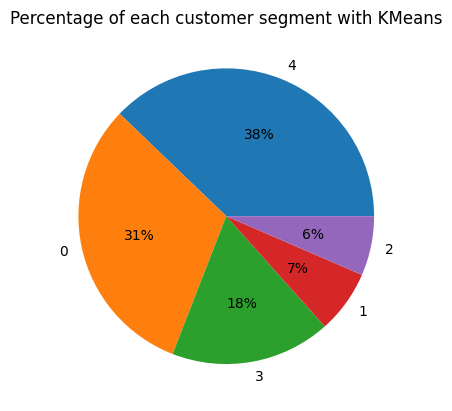

In [65]:
from importlib import reload
plt=reload(plt)
plt.pie(df_now.Cluster.value_counts(),labels=df_now.Cluster.value_counts().index,autopct='%.0f%%')
plt.title("Percentage of each customer segment with KMeans")
plt.show()

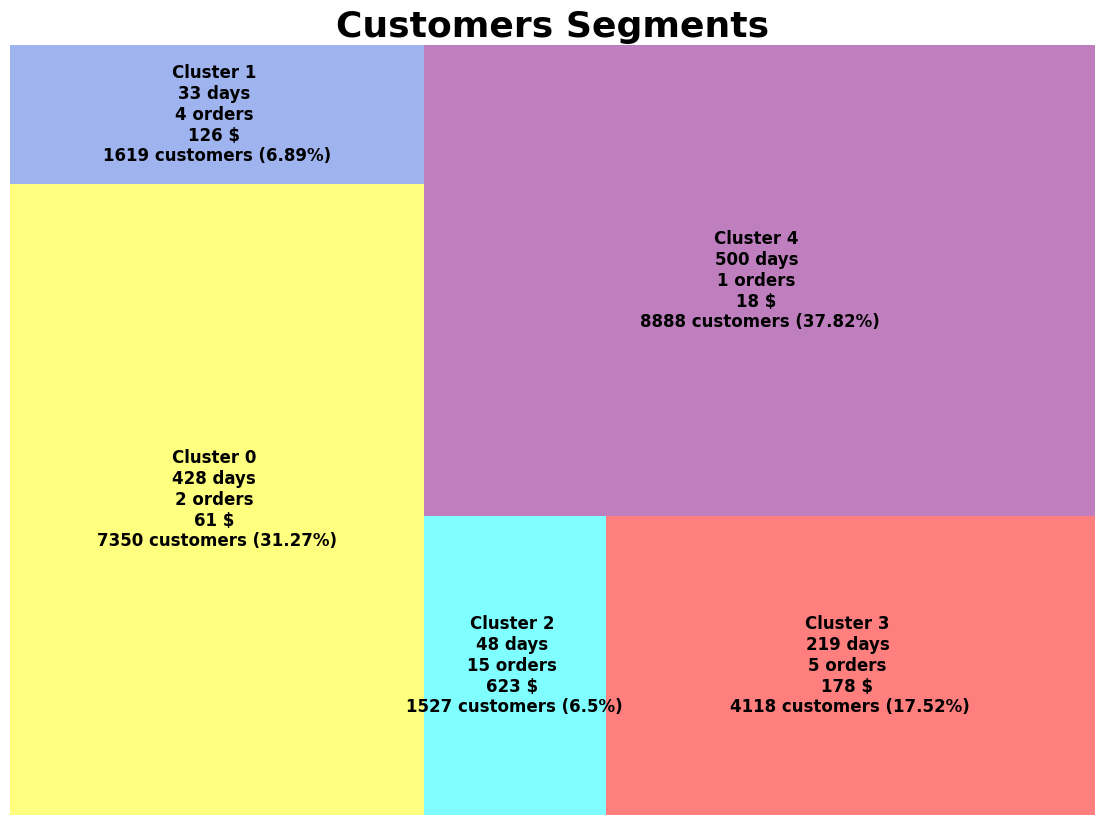

In [67]:
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(14, 10)

colors_dict2 = {'Cluster0':'yellow','Cluster1':'royalblue', 'Cluster2':'cyan',
               'Cluster3':'red', 'Cluster4':'purple', 'Cluster5':'green', 'Cluster6':'gold'}

squarify.plot(sizes=rfm_agg_kmeans_k_5['Count'],
              text_kwargs={'fontsize':12,'weight':'bold', 'fontname':"sans serif"},
              color=colors_dict2.values(),
              label=['{} \n{:.0f} days \n{:.0f} orders \n{:.0f} $ \n{:.0f} customers ({}%)'.format(*rfm_agg_kmeans_k_5.iloc[i])
                      for i in range(0, len(rfm_agg_kmeans_k_5))], alpha=0.5 )


plt.title("Customers Segments",fontsize=26,fontweight="bold")
plt.axis('off')

plt.savefig('Unsupervised Segments.png')
plt.show()

In [68]:
import plotly.express as px

fig = px.scatter_3d(rfm_agg_kmeans_k_5, x='RecencyMean', y='FrequencyMean', z='MonetaryMean',
                    color = 'Cluster', opacity=0.3)
fig.update_traces(marker=dict(size=20),
                  
                  selector=dict(mode='markers'))
fig.show()

In [70]:
import plotly.express as px

fig = px.scatter(rfm_agg_kmeans_k_5, x="RecencyMean", y="MonetaryMean", size="FrequencyMean", color="Cluster",
           hover_name="Cluster", size_max=100)
fig.show()

### K=6

In [71]:
model = KMeans(n_clusters=6, random_state=42)
model.fit(RFM_Table_scaled)
model.labels_.shape

(23502,)

In [72]:
df_now["Cluster"] = model.labels_
df_now.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'Monetary':['mean', 'count']}).round(2)

Recency Frequency Monetary      
           mean      mean     mean count
Cluster                                 
0        475.45      1.32    48.09  7000
1         32.89      4.12   119.06  1503
2        148.27      7.45   305.14  2241
3        283.89      3.01   106.88  4573
4        499.85      1.02    15.36  7182
5         22.91     16.29   699.77  1003

In [73]:
# Calculate average values for each RFM_Level, and return a size of each segment 
rfm_agg_kmeans_k_6 = df_now.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']}).round(0)

rfm_agg_kmeans_k_6.columns = rfm_agg_kmeans_k_6.columns.droplevel()
rfm_agg_kmeans_k_6.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']
rfm_agg_kmeans_k_6['Percent'] = round((rfm_agg_kmeans_k_6['Count']/rfm_agg_kmeans_k_6.Count.sum())*100, 2)

# Reset the index
rfm_agg_kmeans_k_6 = rfm_agg_kmeans_k_6.reset_index()

# Change thr Cluster Columns Datatype into discrete values
rfm_agg_kmeans_k_6['Cluster'] = 'Cluster '+ rfm_agg_kmeans_k_6['Cluster'].astype('str')

# Print the aggregated dataset
rfm_agg_kmeans_k_6

Cluster  RecencyMean  FrequencyMean  MonetaryMean  Count  Percent
0  Cluster 0        475.0            1.0          48.0   7000    29.78
1  Cluster 1         33.0            4.0         119.0   1503     6.40
2  Cluster 2        148.0            7.0         305.0   2241     9.54
3  Cluster 3        284.0            3.0         107.0   4573    19.46
4  Cluster 4        500.0            1.0          15.0   7182    30.56
5  Cluster 5         23.0           16.0         700.0   1003     4.27

In [74]:
def cluster_function(prediction):
    if prediction =="Cluster 5":
        return "Star"
    elif prediction =="Cluster 2":
        return "Big Spender"
    elif prediction =="Cluster 3":
        return "Cooling Down"
    elif prediction =="Cluster 1":
        return "Loyal"
    elif prediction =="Cluster 0":
        return "Regular"
    return "Lost Cheap"

rfm_agg_kmeans_k_6["type"]=rfm_agg_kmeans_k_6["Cluster"].map(lambda x: (cluster_function(x)))

In [76]:
rfm_agg_kmeans_k_6

Cluster  RecencyMean  FrequencyMean  MonetaryMean  Count  Percent  \
0  Cluster 0        475.0            1.0          48.0   7000    29.78   
1  Cluster 1         33.0            4.0         119.0   1503     6.40   
2  Cluster 2        148.0            7.0         305.0   2241     9.54   
3  Cluster 3        284.0            3.0         107.0   4573    19.46   
4  Cluster 4        500.0            1.0          15.0   7182    30.56   
5  Cluster 5         23.0           16.0         700.0   1003     4.27   

           type  
0       Regular  
1         Loyal  
2   Big Spender  
3  Cooling Down  
4    Lost Cheap  
5          Star

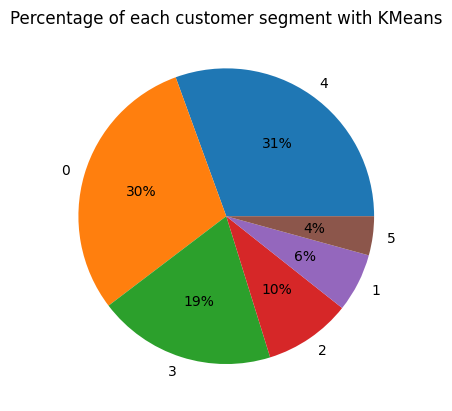

In [77]:
from importlib import reload
plt=reload(plt)
plt.pie(df_now.Cluster.value_counts(),labels=df_now.Cluster.value_counts().index,autopct='%.0f%%')
plt.title("Percentage of each customer segment with KMeans")
plt.show()

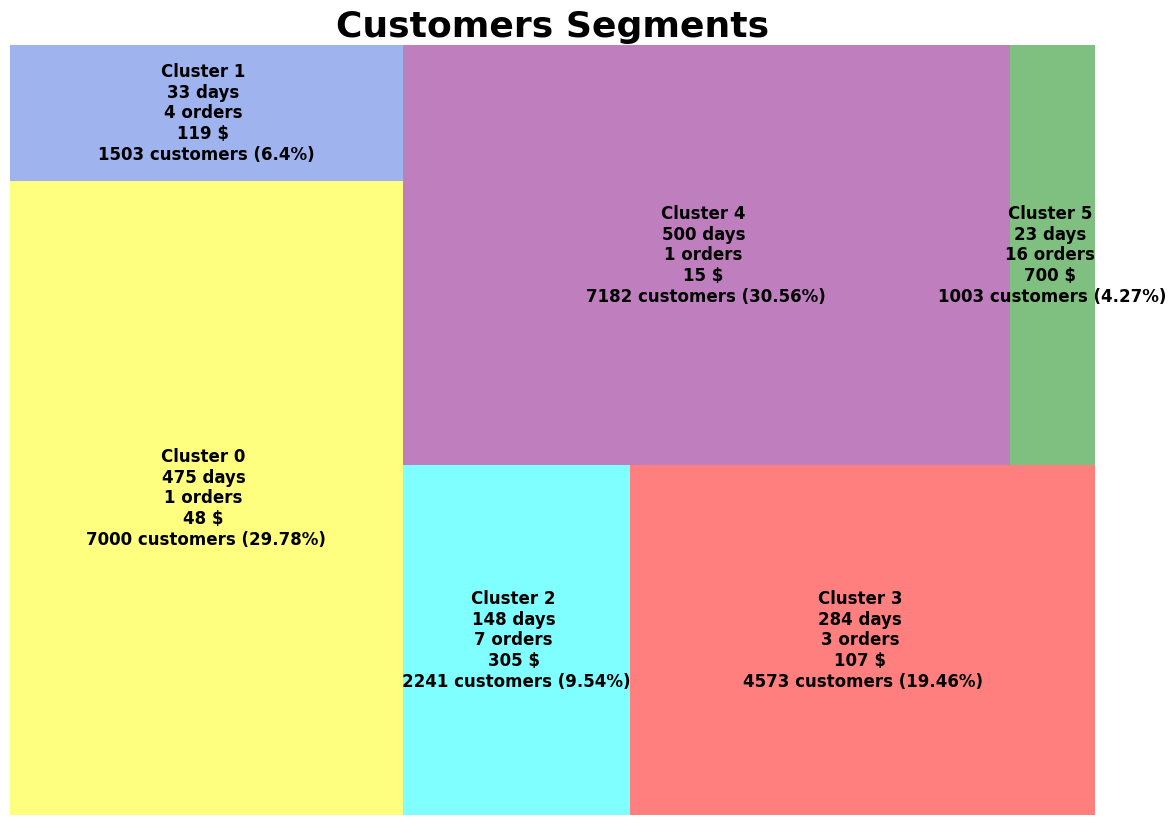

In [78]:
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(14, 10)

colors_dict2 = {'Cluster0':'yellow','Cluster1':'royalblue', 'Cluster2':'cyan',
               'Cluster3':'red', 'Cluster4':'purple', 'Cluster5':'green', 'Cluster6':'gold'}

squarify.plot(sizes=rfm_agg_kmeans_k_6['Count'],
              text_kwargs={'fontsize':12,'weight':'bold', 'fontname':"sans serif"},
              color=colors_dict2.values(),
              label=['{} \n{:.0f} days \n{:.0f} orders \n{:.0f} $ \n{:.0f} customers ({}%)'.format(*rfm_agg_kmeans_k_6.iloc[i])
                      for i in range(0, len(rfm_agg_kmeans_k_6))], alpha=0.5 )


plt.title("Customers Segments",fontsize=26,fontweight="bold")
plt.axis('off')

plt.savefig('Unsupervised Segments.png')
plt.show()

In [79]:
import plotly.express as px

fig = px.scatter_3d(rfm_agg_kmeans_k_6, x='RecencyMean', y='FrequencyMean', z='MonetaryMean',
                    color = 'Cluster', opacity=0.3)
fig.update_traces(marker=dict(size=20),
                  
                  selector=dict(mode='markers'))
fig.show()

In [80]:
import plotly.express as px

fig = px.scatter(rfm_agg_kmeans_k_6, x="RecencyMean", y="MonetaryMean", size="FrequencyMean", color="Cluster",
           hover_name="Cluster", size_max=100)
fig.show()

In [81]:
from pyclustertend import hopkins, ivat ## the hopkins test

In [82]:
hopkins(df_now, df_now.shape[0]) # giá trị cho thấy có thể phân cụm

0.003299026530617776

### Agglomerative Hierarchical Clustering

In [83]:
data = RFM_Table_scaled
data[:5]

array([[-4.56308252,  7.08143428,  5.07024646],
       [-5.20860165,  7.21091574,  4.66847139],
       [-3.5399589 ,  6.57586941,  4.43986706],
       [ 0.4725476 ,  4.93231014,  4.38358211],
       [-2.51683529,  5.10231408,  4.37587971]])

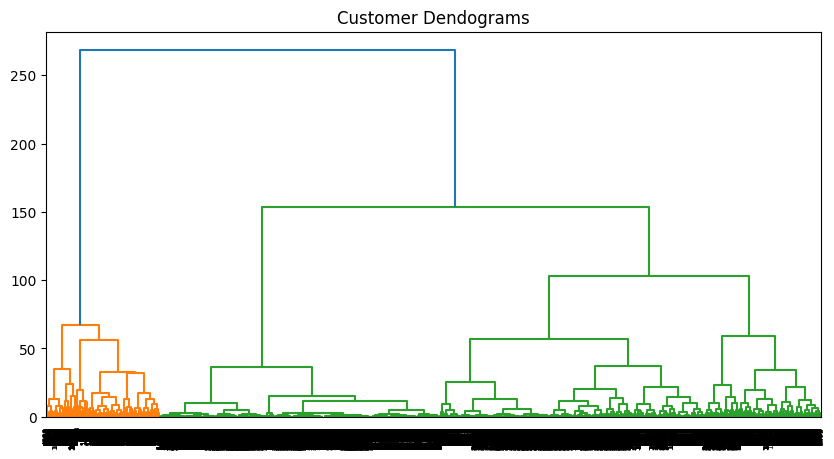

In [84]:
from scipy.cluster import hierarchy
plt.figure(figsize=(10, 5))
plt.title("Customer Dendograms")
dend = hierarchy.dendrogram(hierarchy.linkage(data, method='ward'))

In [85]:
# cluster = 4
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=5,
affinity='euclidean', linkage='ward')
cluster.fit(data)

AgglomerativeClustering(affinity='euclidean', n_clusters=5)

In [86]:
df_now['cluster_'] = cluster.labels_
df_now

Recency  Frequency  Monetary  Cluster  cluster_
customer_id                                                 
7592               1        201  13990.93        5         3
14048              0        217   8976.33        5         3
7983               5        149   6973.07        5         3
19339            445         56   6552.70        5         3
7931              17         62   6497.18        5         3
...              ...        ...       ...      ...       ...
16115            489          1      3.99        4         2
1770             538          1      3.99        4         2
3477             532          1      3.99        4         2
5383             525          1      3.99        4         2
17312            485          1      3.99        4         2

[23502 rows x 5 columns]

In [87]:
# Calculate average values for each RFM_Level, and return a size of each segment 
# Calculate average values for each RFM_Level, and return a size of each segment 
rfm_agg_hir = df_now.groupby('cluster_').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']}).round(0)

rfm_agg_hir.columns = rfm_agg_hir.columns.droplevel()
rfm_agg_hir.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']
rfm_agg_hir['Percent'] = round((rfm_agg_hir['Count']/rfm_agg_hir.Count.sum())*100, 2)

# Reset the index
rfm_agg_hir = rfm_agg_hir.reset_index()

# Change thr Cluster Columns Datatype into discrete values
rfm_agg_hir['cluster_'] = 'cluster '+ rfm_agg_hir['cluster_'].astype('str')

# Print the aggregated dataset
rfm_agg_hir

cluster_  RecencyMean  FrequencyMean  MonetaryMean  Count  Percent
0  cluster 0        191.0            4.0         148.0   3522    14.99
1  cluster 1        433.0            2.0          63.0   8028    34.16
2  cluster 2        502.0            1.0          18.0   8514    36.23
3  cluster 3         74.0           11.0         448.0   2502    10.65
4  cluster 4         14.0            6.0         214.0    936     3.98

In [92]:
def cluster_function(prediction):
    if prediction =="cluster 3":
        return "Star"
    elif prediction =="cluster 4":
        return "Big Spender"
    elif prediction =="cluster 0":
        return "Loyal"
    elif prediction =="cluster 1":
        return "Regular"
    return "Lost Cheap"

rfm_agg_hir["type"]=rfm_agg_hir["cluster_"].map(lambda x: (cluster_function(x)))

In [93]:
rfm_agg_hir

cluster_  RecencyMean  FrequencyMean  MonetaryMean  Count  Percent  \
0  cluster 0        191.0            4.0         148.0   3522    14.99   
1  cluster 1        433.0            2.0          63.0   8028    34.16   
2  cluster 2        502.0            1.0          18.0   8514    36.23   
3  cluster 3         74.0           11.0         448.0   2502    10.65   
4  cluster 4         14.0            6.0         214.0    936     3.98   

          type  
0        Loyal  
1      Regular  
2   Lost Cheap  
3         Star  
4  Big Spender

In [91]:
import plotly.express as px

fig = px.scatter(rfm_agg_hir, x="RecencyMean", y="MonetaryMean", size="FrequencyMean", color="cluster_",
           hover_name="cluster_", size_max=100)
fig.show()

In [ ]:
df_now